## Target Encoding

A target encoding is any kind of encoding that replaces a feature's categories with some number derived from the target.

**Use Cases for Target Encoding**
Target encoding is great for:
* **High-cardinality features**: A feature with a large number of categories can be troublesome to encode: a one-hot encoding would generate too many features and alternatives, like a label encoding, might not be appropriate for that feature. A target encoding derives numbers for the categories using the feature's most important property: its relationship with the target.
* **Domain-motivated features**: From prior experience, you might suspect that a categorical feature should be important even if it scored poorly with a feature metric. A target encoding can help reveal a feature's true informativeness.

In [1]:
import pandas as pd

autos = pd.read_csv('autos.csv')

In [2]:
autos.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [3]:
autos['make_encoded'] = autos.groupby('make')['price'].transform('mean')
autos[['make','price','make_encoded']].head(10)

,make,price,make_encoded
0,alfa-romero,13495,15498.333333
1,alfa-romero,16500,15498.333333
2,alfa-romero,16500,15498.333333
3,audi,13950,17859.166667
4,audi,17450,17859.166667
5,audi,15250,17859.166667
6,audi,17710,17859.166667
7,audi,18920,17859.166667
8,audi,23875,17859.166667
9,bmw,16430,26118.750000


In [5]:
# Smoothing
import numpy as np
df = pd.read_csv('movielens1m.csv')
df = df.astype(np.uint8, errors='ignore')
print('Number of unique Zipcodes : {}'.format(df['Zipcode'].nunique()))

Number of unique Zipcodes : 3439


In [8]:
X = df.copy()
y = X.pop('Rating')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

In [9]:
!pip install category_encoders

  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)


In [10]:
from category_encoders import MEstimateEncoder

encoder = MEstimateEncoder(cols=['Zipcode'],m=5.0)
encoder.fit(X_encode,y_encode)
X_train = encoder.transform(X_pretrain)

C:\Users\prvzs\OneDrive\Desktop\Desktop\Datasets_and_Projects\Kaggle\KAGGLE_COURSE\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


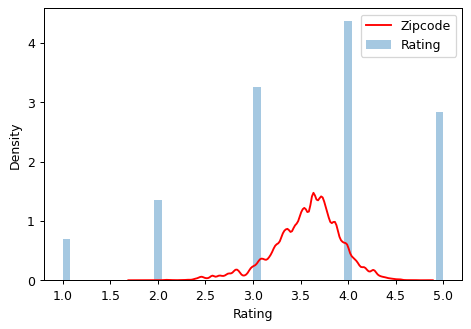

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(dpi=90)
ax = sns.distplot(y,kde=False,norm_hist=True)
ax = sns.kdeplot(X_train.Zipcode, color='r',ax=ax)
ax.set_xlabel('Rating')
ax.legend(labels=['Zipcode','Rating']);